In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def imshow(imgs, figsize=(12.5, 10), **kwargs):
    """ Utility function for dispalying an array of images. """
    if not isinstance(imgs, list): imgs = [imgs]
    cols = int(np.ceil(np.sqrt(len(imgs))))
    rows = cols-1 if (cols*cols-len(imgs)== cols) else cols
    fig, axs = plt.subplots(rows, cols, figsize=figsize, squeeze=False)
    for img, ax in zip(imgs, axs.flatten()): 
        cm, sl = ('gray', np.s_[:, :]) if img.ndim == 2 else (None, np.s_[...,::-1])
        ax.imshow(img[sl], cmap=cm, **kwargs)
    for ax in axs.flatten(): ax.axis('off')
    plt.tight_layout()

In [3]:
def write_aruco_marker(out_dir, aruco_dict)
    """ Write images of the markers with id 0,1,2,3 to the specified dir. """
    path_frmt = os.path.join(out_dir, '{id}-4x4-50.png')
    os.makedirs(markers_dir, exist_ok=True)

    for i in range(4):
        img = cv2.aruco.drawMarker(ar_dict, i, 500)
        cv2.imwrite(path_frmt.format(id=i), img)
        
ar_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
markers_dir = os.path.expanduser('~/Desktop/aruco_marker')
write_aruco_marker(markers_dir, ar_dict)

In [3]:
cm_img = cv2.imread('../data/test-images/home-aruco-1.jpg')
cm_img_gray = cv2.cvtColor(cm_img, cv2.COLOR_BGR2GRAY)

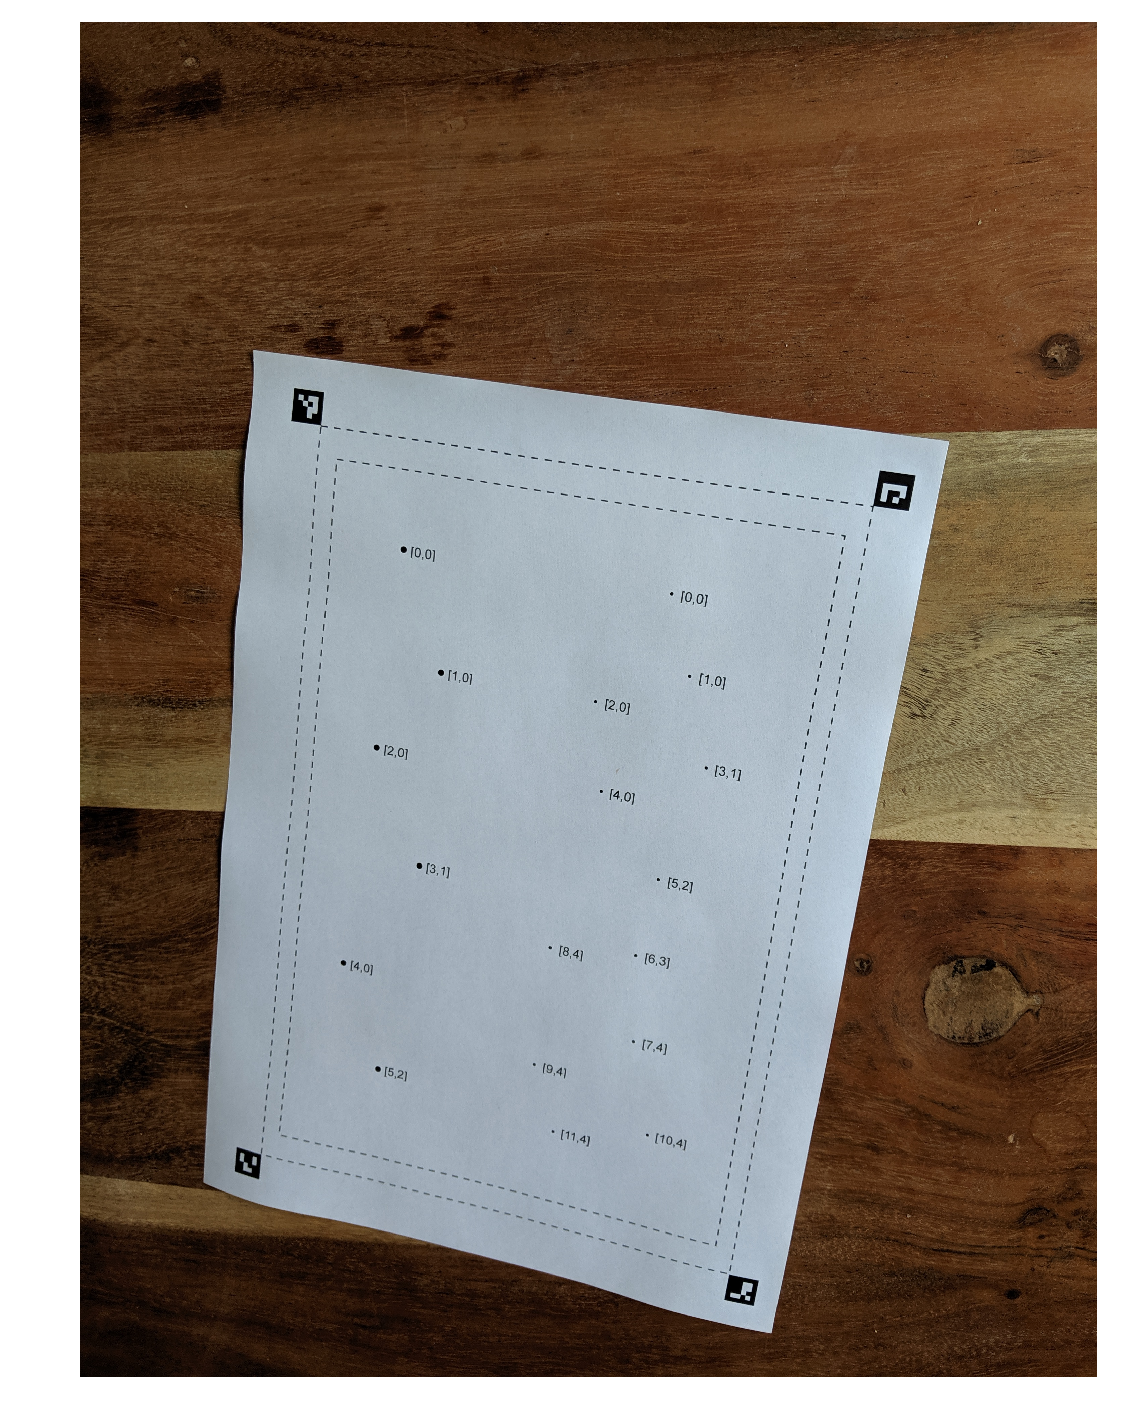

In [6]:
imshow(cm_img)

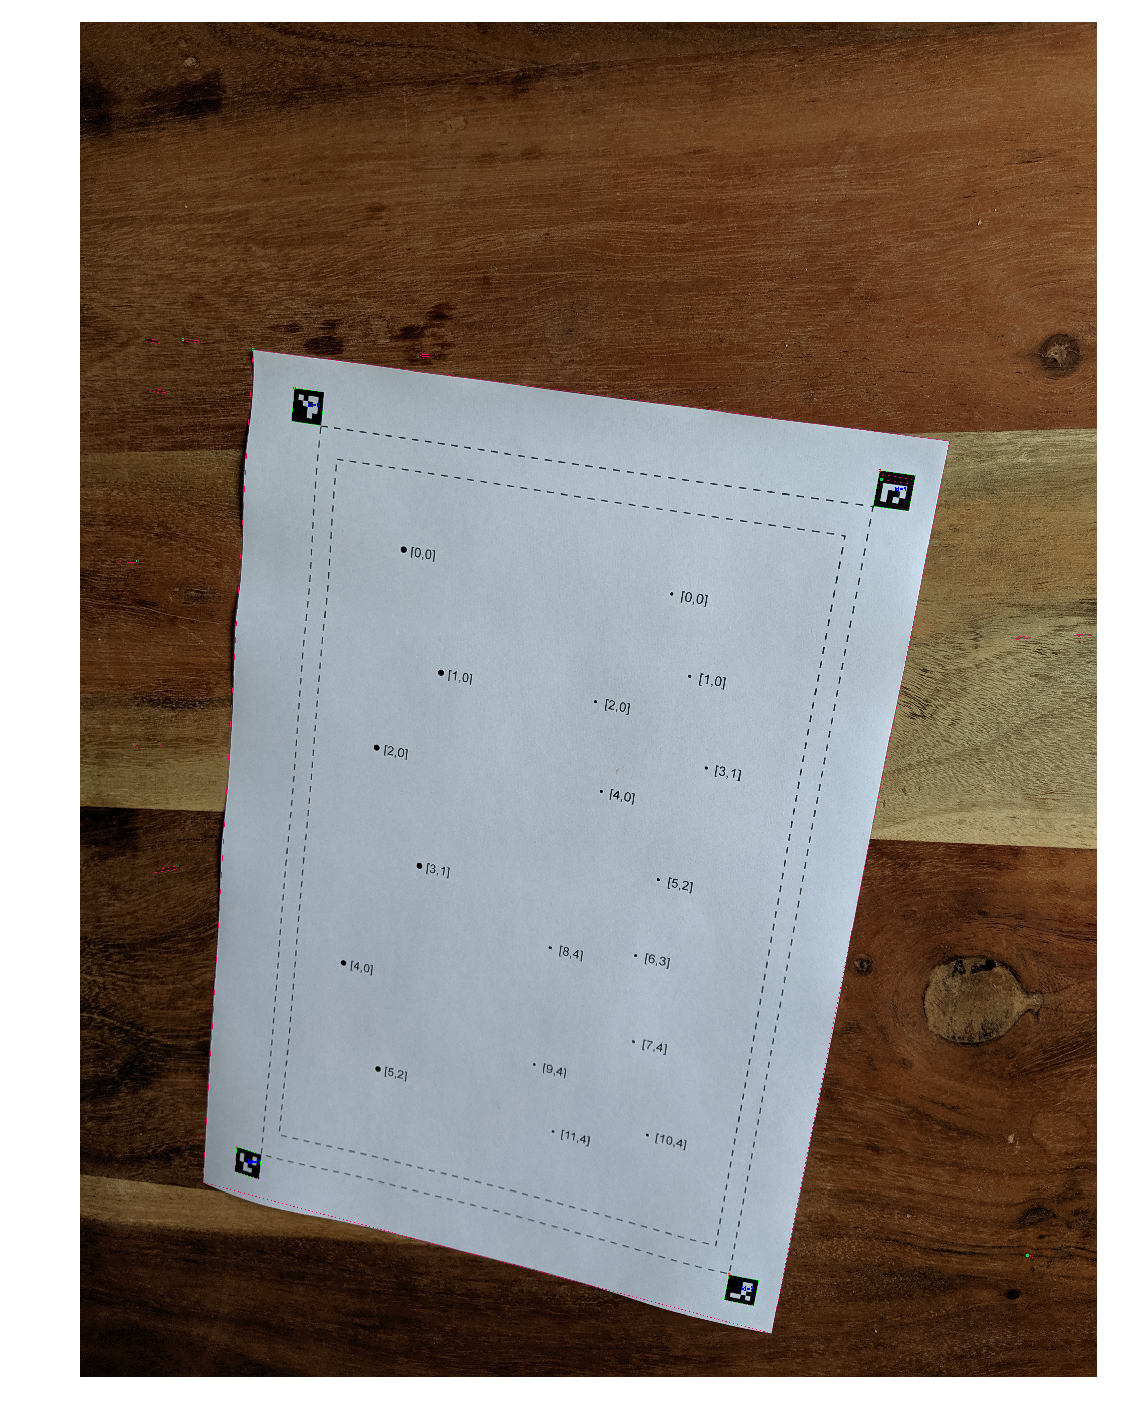

In [148]:
parameters =  cv2.aruco.DetectorParameters_create()
parameters.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(cm_img_gray, ar_dict, parameters=parameters)
frame_markers = cv2.aruco.drawDetectedMarkers(cm_img.copy(), corners, ids)
frame_markers = cv2.aruco.drawDetectedMarkers(frame_markers, rejectedImgPoints, borderColor=(100, 0, 240))

imshow(frame_markers)

In [149]:
corners

[array([[[2377.943 , 1334.1279],
         [2484.1833, 1349.4899],
         [2463.572 , 1454.8318],
         [2358.2896, 1440.4154]]], dtype=float32),
 array([[[ 636.56866, 1088.7882 ],
         [ 725.6561 , 1101.454  ],
         [ 717.5421 , 1201.0494 ],
         [ 627.58954, 1186.8488 ]]], dtype=float32),
 array([[[1930.0853, 3726.5303],
         [2017.558 , 3744.485 ],
         [2002.6302, 3820.258 ],
         [1915.4733, 3802.2483]]], dtype=float32),
 array([[[ 466.04904, 3347.3108 ],
         [ 538.2506 , 3368.8962 ],
         [ 531.5046 , 3443.0125 ],
         [ 460.39145, 3419.6667 ]]], dtype=float32)]

In [150]:
ids

array([[1],
       [0],
       [2],
       [3]], dtype=int32)

In [175]:
h,w = cm_img_gray.shape
middle = np.float32([h/2, w/2])
ids2point = {}

for mid, m_corners in zip(np.squeeze(ids), np.squeeze(corners)):
    ds = np.sqrt(np.sum((m_corners-middle)**2, axis=1)) # distance of corner points to center of image
    ids2point[mid] = m_corners[np.argmin(ds)]

In [178]:
width, height = 17., 25.66 # size of area marked by inner points of aruco markers in cm
dst_h, dst_w = int(height*50), int(width*50) 

src_pts = np.array([ids2point[i] for i in range(4)])
dst_pts = np.array([[0, 0],
                    [dst_w - 1, 0],
                    [dst_w - 1, dst_h - 1],
                    [0, dst_h - 1]], dtype="float32")

M = cv2.getPerspectiveTransform(src_pts, dst_pts)

In [179]:
warped = cv2.warpPerspective(cm_img_gray, M, (dst_w, dst_h))

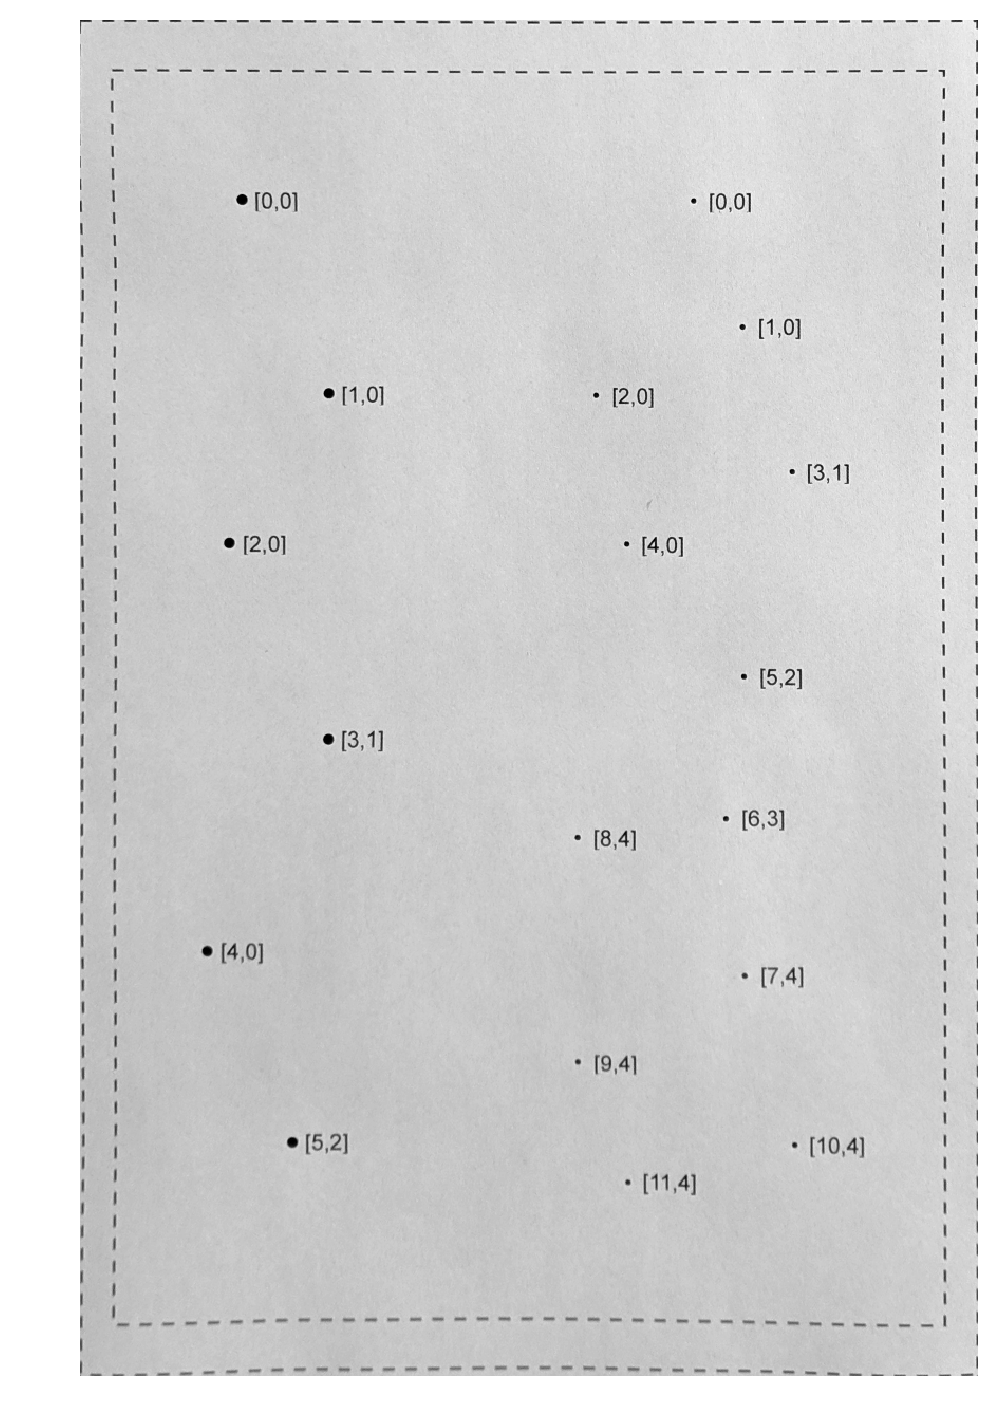

In [180]:
imshow(warped)